In [30]:
#Dependecny which provides us with the Training data set of the predicting the house
from sklearn.datasets import load_boston
import numpy as np

In [31]:
boston = load_boston()

#Now first let's have a look at all the feautures which are there for input example in boston
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [32]:
#Let also see, what each feauture represents
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
X = boston.data
Y = boston.target

print(X.shape)
print(Y.shape)
print(type(X),type(Y))

(506, 13)
(506,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [34]:
#Now let's look at the data first. Looking data in the form of table will help us understand it better. So let's use pandas
import pandas as pd

df = pd.DataFrame(X)
df.head()
#Therefore clearly in total we have 13 features for each input example


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
"""
Clearly data is not normalised. Therefore first normalise the data. Then only use it. Note- Obviously we will normalise
it feature wise. Therefore calculate mean and standard deviation columm wise
"""
u = np.mean(X,axis = 0)
std = np.std(X,axis = 0)

print(u.shape,std.shape)
print(u)
print(std)


(13,) (13,)
[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]
[8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00]


In [36]:
#Normalising the data
X = (X - u)/std

#### Concept to normalise the data done above is discussed in extras in numpy
<img src='Explaination.jpeg'>

In [37]:
X.shape , Y.shape

((506, 13), (506,))

## Linear Regression on Multiple Features Algo

In [38]:
#First Modifying the input matrix X to add the first column Xo
ones = np.ones((X.shape[0],1))
print(ones.shape)

(506, 1)


In [39]:
X = np.concatenate((ones,X),axis=1)
print(X.shape)

(506, 14)


In [40]:
# We should first confirm if 1 is added as 1st column or not
pd.DataFrame(X).head(n=7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,1.0,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.0,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.0,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.0,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
5,1.0,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322
6,1.0,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268


In [ ]:
"""
Avoid loops in the implemenation, except gradient descent main loop.Use numpy functions like np.sum(), np.dot() 
which are quite fast and already optimised
"""

In [46]:
def hypothesis(X,theta):
    #Initially X is (506,14) and theta is (14,). Note - Here we don't need to transpose it as it is already present 
    #in the form of vector (which is seen vertically only)
    
    #Therefore it will calculate the multplicative product, even if we pass single X
    mulitplicative_product =  np.dot(X,theta) #Therefore now it's shape will be (506,)
    return mulitplicative_product


def error(X,Y,theta):
    #Shape of X is (506,14), Y is (506,) and theta is (14,)
    predictedYs = hypothesis(X,theta) #Shape - (506,)
    e = np.sum((Y-predictedYs)**2) #Here first matrix element wise subtraction will take place, then through 
    #broadcasting for each term square will be calculated
    return e/X.shape[0]
    
    
def gradient(X,Y,theta):
    predictedYs = hypothesis(X,theta) #Shape is (506,)
    X_Transpose = np.transpose(X)  #Shape is (14,506)
    grad = np.dot(X_Transpose,(predictedYs-Y)) #Shape is (14,)
    return grad/X.shape[0]  


def applying_gradient_descentRul(X,Y,learning_rate = 0.1,max_iterations = 500):
    
    #Initializing initially all thetas as 0. They would be gradually updated using update rule
    theta = np.zeros(( X.shape[1],))
    
    error_list = []
    
    for i in range(max_iterations):
        e = error(X,Y,theta)
        error_list.append(e)
        
        #Finding the new gradients at this update 
        grads = gradient(X,Y,theta)
        theta = theta - learning_rate*grads
        
    return theta,error_list



Time Taken is  0.04562211036682129


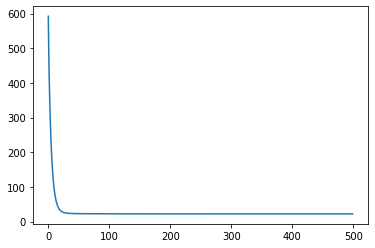

In [47]:
#Let also calculate the time it takes to calcuate theta for this --
import time

start  = time.time()
theta,error_list = applying_gradient_descentRul(X,Y)
end = time.time()
print("Time Taken is ",end-start)


import matplotlib.pyplot as plt

plt.plot(error_list)
plt.show()

### Calculating the R2 Score for above

In [48]:
print(theta)

[ 2.25328063e+01 -9.21661049e-01  1.07018508e+00  1.05792229e-01
  6.86754753e-01 -2.05015324e+00  2.68068988e+00  1.39987663e-02
 -3.10628221e+00  2.57363827e+00 -1.97626899e+00 -2.05723354e+00
  8.48669383e-01 -3.74020167e+00]


In [49]:
def r2_score(Y,Y_):
    numerator = np.sum((Y-Y_)**2)
    denominator = np.sum((Y-Y.mean())**2)
    score = 1 -(numerator/denominator)
    return score*100
    
print(r2_score(Y,hypothesis(X,theta)))

74.06279773949944


In [ ]:
"""
Accuracy is coming very less, therefore there might be some other way too not necessarily linear with which we 
can approximate this F(X) , so that it is more closer to actual Y. Maybe F(X) can be approximated by some other 
function which may be quadratic or any other general function. 
"""